### Data_set: 
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Attribute Information:



Name -- Data Type -- Measurement -- Description

    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.shape

#Data has 1030 rows and 9 columns

(1030, 9)

In [5]:
df.dtypes

#Except for age all columns are float datatype

#Age has int datatype. 

#All the columns are continous



cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [6]:
#Five point summary

df.describe()
#We can see that mean of the columns are not in the same scale, we might need to scale the data before modelling

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
#There are no categorical variables in this dataset

In [8]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100
#There are no null values in this dataset

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

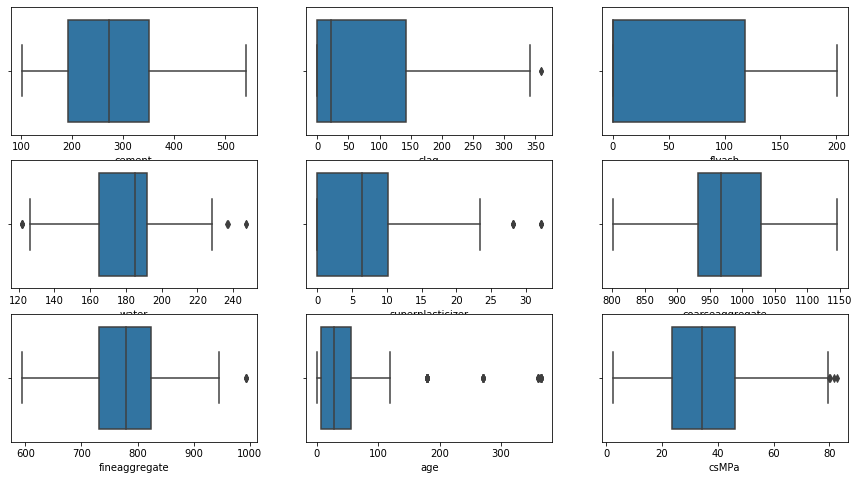

In [10]:
#outlier check

fig,ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,8))

for i,j in zip(df.columns,ax.flatten()):
    sns.boxplot(df[i],ax = j)
    
plt.show()


#Outliers are present in the data, we will be treating it in the later part of this notebook

In [11]:
# We can see few outliers in the features
# It is better to use IQR to treat the columns


q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

df = df[~((df < (q1 - 1.5 * iqr))| (df > (q3 + 1.5 * iqr))).any(axis = 1)]

df.shape

#We now have 941 rows and 9 columns after removing outliers

(941, 9)

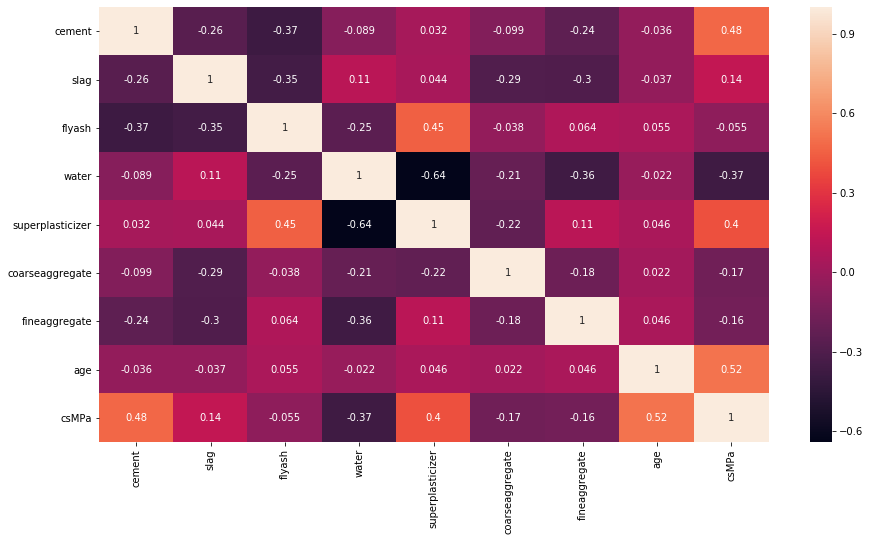

In [12]:
#To check for correlation with target we can use heatmap and infer


plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

In [13]:
#Inference 

# We can see that age,superplasticizer and cemet have high correlation with the target

#fineaggregate,coarseaggregrate,water,flyash have negative correlation with the target


#Slag has the lowest positive correlation with target

#Age has the highest correlation with target followed by cement

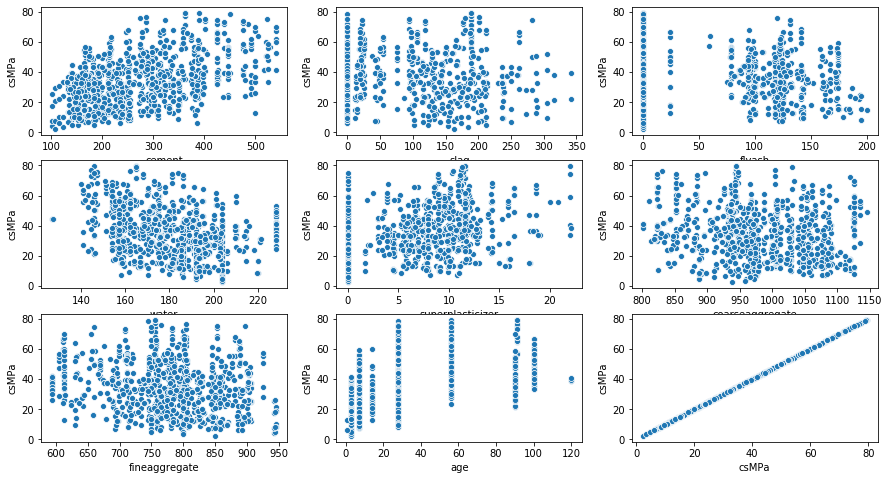

In [14]:
#Excluding variables


fig,ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,8))

for i,j in zip(df.columns,ax.flatten()):
    sns.scatterplot(x= df[i],y = df['csMPa'],ax = j)
    
plt.show()

In [15]:
#Actions based on inference:

#We can see that all the features have a linear relationship with target, Hence we cannot drop any of the features of now. 

#In the later part of modelling we can check for multicollinearity and remove those features if needed


In [16]:
#Train test split

from sklearn.model_selection import train_test_split

x = df.drop('csMPa',axis = 1)
y = df['csMPa']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [17]:
#To test statistically we can use t-test

from scipy.stats import ttest_ind

ttest_ind(y_train,y_test)


#h0: Train and test represent truly
#h1: Train and test do not represent truly

#We can see that p-value for both train and test is higher than alpha( 0.05), hence we accept null hypothesis


Ttest_indResult(statistic=-0.7958502323655189, pvalue=0.4263202312353417)

In [18]:
ttest_ind(x_train,x_test)

#We can see that p-value for both train and test for almost all variables is higher than alpha( 0.05),

#hence we accept null hypothesis

#Both train and test are true representative of the data


Ttest_indResult(statistic=array([-0.55295151, -0.27646989,  0.74693362, -0.33988985,  0.60290762,
        1.16608413, -0.33108275, -0.75537448]), pvalue=array([0.58042822, 0.78224803, 0.45529061, 0.73401549, 0.54671573,
       0.24387652, 0.74065585, 0.45021375]))

In [19]:
import statsmodels.api as sm

x = df.drop('csMPa',axis = 1)
y = df['csMPa']

x = sm.add_constant(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
model = sm.OLS(y_train,x_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     291.5
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.96e-209
Time:                        15:52:25   Log-Likelihood:                -2278.6
No. Observations:                 658   AIC:                             4575.
Df Residuals:                     649   BIC:                             4616.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               71.1639     25.432      2.798      0.005      21.225     121.103
cement               0.0977      0.008     12.364      0.000       0.082       0.113
slag                 0.0735      0.009      7.742      0.000       0.055       0.092
flyash               0.0445      0.012      3.830      0.000       0.022       0.067
water               -0.2864      0.040     -7.145      0.000      -0.365      -0.208
superplasticizer     0.1635      0.100      1.643      0.101      -0.032       0.359
coarseaggregate     -0.0195      0.009     -2.187      0.029      -0.037      -0.002
fineaggregate       -0.0151      0.010     -1.482      0.139      -0.035       0.005
age                  0.3182      0.011     28.266      0.000       0.296       0.340
==============================================================================
Omnibus:                        6.121   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.783
Skew:                           0.145   Prob(JB):                       0.0337
Kurtosis:                       3.404   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#R2 score is 0.775 and adjusted R2 is 0.772

from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

print('R2 score for overall model is 0.775')

print('Adjusted R2 score for overall model is 0.772')

print('Mean squared error for train is',mse_train)

print('Mean squared error for test data is',mse_test)

print('RMSE for train data is',np.sqrt(mse_train))

print('RMSE for test data is',np.sqrt(mse_test))

# Since Adjusted R2 is higher than R2, overfitting is present in this model.



R2 score for overall model is 0.775
Adjusted R2 score for overall model is 0.772
Mean squared error for train is 59.611442624004965
Mean squared error for test data is 72.64023744477144
RMSE for train data is 7.720844683323514
RMSE for test data is 8.522924230847734


In [22]:
#Checking or multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif['features'] = x.columns


vif.sort_values('vif_factor',ascending = False)

# We can see that slag and cement have high multicollinearity in our model

#Since we are considering the threshold as 6 for our model, 

#we can drop the above mentioned columns and check the overall performance of the model

,vif_factor,features
0,7396.629987,const
2,7.754880,slag
1,7.401657,cement
7,6.633470,fineaggregate
3,6.503741,flyash
4,6.284609,water
6,5.423524,coarseaggregate
5,3.047766,superplasticizer
8,1.011485,age


In [23]:
x_multi = x.drop(['slag','cement'],axis = 1)

x_train_multi,x_test_multi,y_train,y_test = train_test_split(x_multi,y,test_size = 0.3)




In [24]:
model_multi = sm.OLS(y_train,x_train_multi).fit()

model_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     262.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          4.83e-170
Time:                        15:52:25   Log-Likelihood:                -2384.6
No. Observations:                 658   AIC:                             4783.
Df Residuals:                     651   BIC:                             4815.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              283.6533     13.985     20.283      0.000     256.193     311.114
flyash              -0.0752      0.006    -11.842      0.000      -0.088      -0.063
water               -0.5541      0.034    -16.322      0.000      -0.621      -0.487
superplasticizer     0.3031      0.119      2.549      0.011       0.070       0.537
coarseaggregate     -0.0770      0.006    -12.813      0.000      -0.089      -0.065
fineaggregate       -0.1053      0.006    -18.381      0.000      -0.117      -0.094
age                  0.3206      0.012     26.107      0.000       0.297       0.345
==============================================================================
Omnibus:                        3.304   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.114
Skew:                           0.148   Prob(JB):                        0.211
Kurtosis:                       3.162   Cond. No.                     4.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Inference

#After removing features having multicollinearity, we can see that the model is performing well

y_pred_train = model_multi.predict(x_train_multi)
y_pred_test = model_multi.predict(x_test_multi)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

print('R2 score for overall model is 0.709')

print('Adjusted R2 score for overall model is 0.707')

print('Mean squared error for train is',mse_train)

print('Mean squared error for test data is',mse_test)

print('RMSE for train data is',np.sqrt(mse_train))

print('RMSE for test data is',np.sqrt(mse_test))



R2 score for overall model is 0.709
Adjusted R2 score for overall model is 0.707
Mean squared error for train is 82.28239323035132
Mean squared error for test data is 88.66460204787504
RMSE for train data is 9.070964294403948
RMSE for test data is 9.416188297176042


In [26]:
#Since we the overall r2 and adjusted r2 are almost similiar and same applies with root mean square error as well. 

#Hence we can conclude that multicollinearity is treated and this is better than the base model

In [27]:
#Improving the model 

# We can improve the model by finding significant features and rebuling the model


pvals = pd.DataFrame(model_multi.pvalues,columns = ['PVALUE'])

significant = pvals[pvals['PVALUE'] < 0.05] #significance is assumed as 0.05

signi = significant.index


signi = signi.to_list()

print('The significant features in the model are',signi)

The significant features in the model are ['const', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


In [28]:
x_final = df[['flyash','water','cement','coarseaggregate','fineaggregate','age']]

x_final = sm.add_constant(x_final)

x_train_final,x_test_final,y_train,y_test = train_test_split(x_final,y,test_size = 0.3)



/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
model_final = sm.OLS(y_train,x_train_final).fit()

model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     348.3
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.87e-199
Time:                        15:52:25   Log-Likelihood:                -2310.3
No. Observations:                 658   AIC:                             4635.
Df Residuals:                     651   BIC:                             4666.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             243.6231     10.511     23.179      0.000     222.984     264.262
flyash             -0.0296      0.006     -5.117      0.000      -0.041      -0.018
water              -0.5102      0.021    -23.921      0.000      -0.552      -0.468
cement              0.0455      0.004     11.850      0.000       0.038       0.053
coarseaggregate    -0.0745      0.005    -15.834      0.000      -0.084      -0.065
fineaggregate      -0.0837      0.005    -15.904      0.000      -0.094      -0.073
age                 0.3201      0.011     29.147      0.000       0.299       0.342
==============================================================================
Omnibus:                        5.007   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                6.348
Skew:                           0.030   Prob(JB):                       0.0418
Kurtosis:                       3.477   Cond. No.                     4.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y_pred_train = model_final.predict(x_train_final)
y_pred_test = model_final.predict(x_test_final)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

print('R2 score for overall model is 0.762')

print('Adjusted R2 score for overall model is 0.760')

print('Mean squared error for train is',mse_train)

print('Mean squared error for test data is',mse_test)

print('RMSE for train data is',np.sqrt(mse_train))

print('RMSE for test data is',np.sqrt(mse_test))

R2 score for overall model is 0.762
Adjusted R2 score for overall model is 0.760
Mean squared error for train is 65.65263130925797
Mean squared error for test data is 77.29625228413101
RMSE for train data is 8.102631134962147
RMSE for test data is 8.791828722406448


In [31]:
#We are considering model_final (third model) as the final model




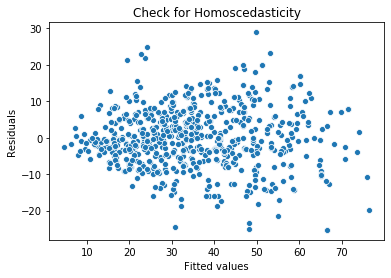

In [45]:
#Checking assuptions


# Check for Homoscedasticity

sns.scatterplot(model_final.fittedvalues,model_final.resid)

plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.show()

In [33]:
# We can see that there is no significant pattern found and hence we can confirm Homoscedasticity in our model

In [46]:
#Check if model is linear statistically


import statsmodels as sm

sm.stats.diagnostic.linear_rainbow(model_final)

(1.0007338355116109, 0.49752084651147127)

In [35]:
#Since P value is higher than 0.05, we can confirm that there is Linearity in our model

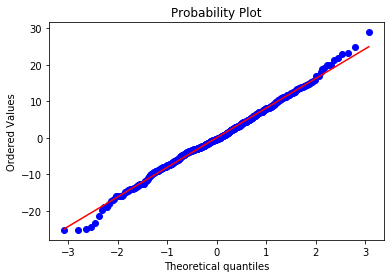

In [47]:
#Normality of residuals

from scipy.stats import probplot

probplot(model_final.resid,plot = plt)

plt.show()

In [37]:
# We can see that residuals are following normality

In [48]:
#Absence of Autocorrelation

from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_final.resid)


2.0414464181238037

In [39]:
# We can see that the value is 1.87 which is very close to 2, 
#Hence we can confirm there is an absence of Auto correlation

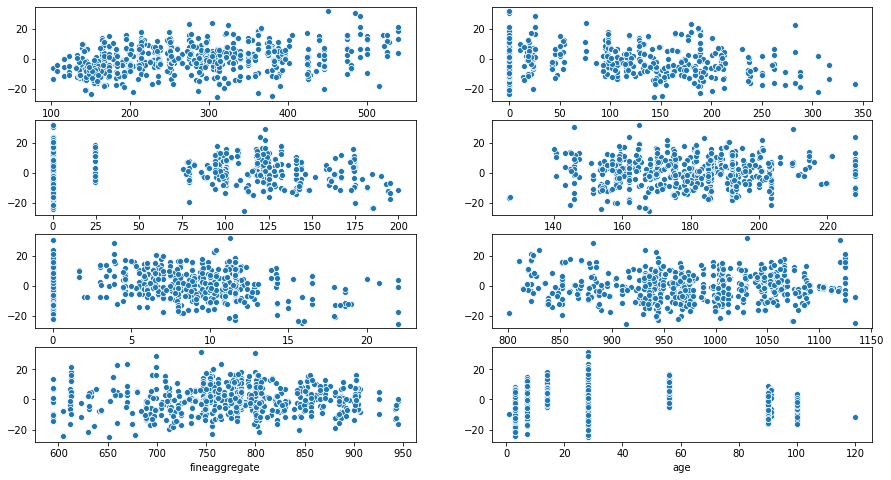

In [40]:
fig,ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,8))

for i,j in zip(x.columns[1:],ax.flatten()):
    sns.scatterplot(x= x[i],y = model_final.resid,ax = j)
    
plt.show()

In [41]:
#All the features follow a Linear relationship with Target variable after buling the final model. 



In [42]:
#Interpretation

#We can see that the model has a good R2 score of 0.76
#Our model satisfies all the assumptions if Linear regression

#Business Interpretation


# Based on the Beta coeffecients of the model,

# Beta coeffecient of alpha implies that there is 0.06 percent descrease in the compressive strength of concrete keeping all other variables constant


# Beta coefficient of Age is the highest where there is a 0.31 percent INCREASE in the compressive strength of concrete while keeping other variables constant


#Age has the highest impact on the compressive strength of concrete 

#Superplasticizer as a very low increase in stregnth compared to other features

#ALl the other features contribute to a decrease in strength of the model




In [43]:
#Changes made from the base model and comments on the final model



#Our first base model had a 77% accuracy, however, we were able to identify overfitting in that model 

# We concluded overfitting since the adjusted R2 was higher than overall R2 score

# The solution to overcome this is by finding and treating multicollinearity in the model

# We used variance inflation factor on all the features to find the vif values

# We could notice that slag and cement have high multicollinearity in our model

# Since we are considering the threshold as 6 for our model, 

# We had dropped the above mentioned columns from the features list

# We fit an OLS model once again and checked the overall performance of the model

# We got an R2 score of 0.709 and adjusted R2 of 0.706

# Though it is lesser than the previous basic model,

#there is no overfitting in the model based on r2,adjusted r2 and root mean square error between train and test were almost equal


#In our third model, we considered only the features which had pvalue lesser than 0.05 in the second model.


#Comparing both, 

#we are able to see better results in the final model (r2 score of 0.76) with no overfitting

#Since model_final has higher R2 than model_multi,

#we can conclude that model_final is the preferred model

#we further evaluated the preferref model to check the assumptions of Linear Regression

# The preferred/final model satisfied all the assumption(Homoscedasticity,Absence of Auto correlation,Normality of Residuals)

